<a href="https://colab.research.google.com/github/dygily1/Storage/blob/master/202209_advanced_Machine_leaning_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1000 data points generated. Seed is 0.


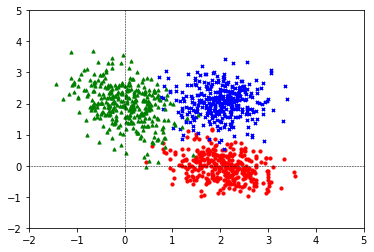

number of classes:  4  sigma for data scatter: 1.0
generating training data
400 data points generated. Seed is random.


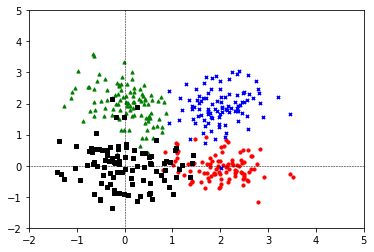

generating test data
100 data points generated. Seed is random.
training softmax classifier...
W =  [[ 1.58614822 -0.65695508]
 [-1.65398856  1.65118027]
 [ 1.43410866 -0.17345393]
 [ 0.43790608  0.95618792]]
b =  [-0.07371519 -0.31149673  0.32153012 -2.93970031]
result =  [[-0.88636732  0.86015977 -0.27208966 -2.78227573]
 [ 1.07573267 -2.44509912  0.95382131 -3.72326056]
 [-0.65414336  0.82162215  0.02650429 -2.47841328]
 ...
 [ 5.7395419  -6.71296045  5.42975396 -1.73459371]
 [ 3.00437312 -3.84472859  2.96376218 -2.47079141]
 [ 2.48508849 -3.45460763  2.42836444 -2.79239047]]
W =  [[ 1.58614822 -0.65695508]
 [-1.65398856  1.65118027]
 [ 1.43410866 -0.17345393]
 [ 0.43790608  0.95618792]]
b =  [-0.07371519 -0.31149673  0.32153012 -2.93970031]
result =  [[-0.88636732  0.86015977 -0.27208966 -2.78227573]
 [ 1.07573267 -2.44509912  0.95382131 -3.72326056]
 [-0.65414336  0.82162215  0.02650429 -2.47841328]
 ...
 [ 5.7395419  -6.71296045  5.42975396 -1.73459371]
 [ 3.00437312 -3.84472859 

TypeError: ignored

In [21]:
'''
HW2 problem
'''

import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special as sp
import time
from scipy.optimize import minimize

#import data_generator as dg

# you can define/use whatever functions to implememt

def generate(number=100, seed=None, plot=True, num_class=3,sigma=1.0):
    
    class_number = (number // num_class)
   
    print("%d data points generated." % (number), end=" ")
    
    if seed is not None:
        np.random.seed(seed)
        print('Seed is %d.' % seed)
    else:
        print('Seed is random.')
    
    sigma2=sigma**2
    mean_dict={0:[2,0],1:[2,2],2:[0,2],3:[0,0]}
    cov_dict={0:[[0.25,-0.1],[-0.1,0.15]],1:[[0.2,0],[0,0.25]],2:[[0.25,-0.15],[-0.15,0.4]],3:[[0.4,0],[0,0.4]]}
    color_dict={0:'red',1:'blue',2:'green',3:'black'}
    marker_dict={0:"o",1:"x",2:"^",3:"s"}

    input_value=None
    output_value=None
    
    for i in range(num_class):
        x_data=np.random.multivariate_normal(mean_dict[i], np.array(cov_dict[i])*sigma2, class_number).T + np.random.uniform(-0.3,0.3, class_number)
        
        if input_value is None:
          input_value = x_data
        else:
          input_value = np.concatenate((x_data,input_value),axis=1)

        labels = (i*np.ones((1,class_number))).astype('uint8')

        if output_value is None:
          output_value = labels
        else:
          output_value=np.concatenate((labels,output_value),axis=1)

        if plot:
            plt.scatter(x_data[0], x_data[1], color=color_dict[i], marker=marker_dict[i], s=10)

    if plot:
        plt.axvline(x=0, ymin=-2, ymax=5, color='black', linestyle='--', linewidth=0.5)
        plt.axhline(y=0, xmin=-2, xmax=5, color='black', linestyle='--', linewidth=0.5)
        plt.axis([-2,5,-2,5])
        plt.show()
        plt.close()


    output_value = output_value.reshape((-1,))

    return input_value.T, output_value.T

if __name__ == '__main__':
   x, y = generate(1000, 0, True, 3, 1.0)



########################################
# cross entropy loss
########################################
def cross_entropy_softmax_loss(Wb, x, y, num_class, n, feat_dim):
    n_test = x.shape[0]
    feat_dim = x.shape[1]
    
    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:].squeeze()
    W = np.reshape(Wb[:-num_class], (num_class, feat_dim))
    accuracy = 0

    # print('X = ', x)
    print('W = ', W)
    print('b = ', b)

    result = x@W.T + b
    print('result = ' , result)
    # implement your function here
    # return cross entropy loss
    pass

# now lets test the model for linear models, that is, SVM and softmax
def linear_classifier_test(Wb, x, y, num_class):
    n_test = x.shape[0]
    feat_dim = x.shape[1]
    
    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:].squeeze()
    W = np.reshape(Wb[:-num_class], (num_class, feat_dim))
    accuracy = 0

    # W has shape (num_class, feat_dim), b has shape (num_class,)

    # score
    s = x@W.T + b
    # score has shape (n_test, num_class)
    
    # get argmax over class dim
    res = np.argmax(s, axis = 1)

    # get accuracy
    accuracy = (res == y).astype('uint8').sum()/n_test
    
    return accuracy


# number of classes: this can be either 3 or 4
num_class = 4

# sigma controls the degree of data scattering. Larger sigma gives larger scatter
# default is 1.0. Accuracy becomes lower with larger sigma
sigma = 1.0

print('number of classes: ',num_class,' sigma for data scatter:',sigma)
if num_class == 4:
    n_train = 400
    n_test = 100
    feat_dim = 2
else:  # then 3
    n_train = 300
    n_test = 60
    feat_dim = 2

# generate train dataset
print('generating training data')
x_train, y_train = generate(number=n_train, seed=None, plot=True, num_class=num_class, sigma=sigma)

# generate test dataset
print('generating test data')
x_test, y_test = generate(number=n_test, seed=None, plot=False, num_class=num_class, sigma=sigma)


# start training softmax classifier
print('training softmax classifier...')
w0 = np.random.normal(0, 1, (2 * num_class + num_class))


#print('y_train = ', y_train)
#print('x_train = ', x_train)
#print('w0 = ', w0)


result = minimize(cross_entropy_softmax_loss, w0, args=(x_train, y_train, num_class, n_train, feat_dim))

print('testing softmax classifier...')

Wb = result.x
print('accuracy of softmax loss: ', linear_classifier_test(Wb, x_test, y_test, num_class)*100,'%')


#num_class = 4로 줘야 하
#sigma를 키우면 표준편차가 커지기 때문에 퍼지게 되고 작게 하면 표준편차가 작아지기 때문에 바운드리를 넘어가지 않게 할 수있다.
#목적은 softmax-classifier를 만드는게 목적이다.
#cross_entropy_softmax_loss함수를 구현하는게 목적이다.
#데이터 setsize가지 넘기는게 일이다.
#input x, output y ( 정답 vector ),  generate라는 함수를 통해서 총 데이터 샘플을 통해서 인자를 통해 넘겨주고 분류하는것
#사실 x, y를 쉽게 하기 위해 만들어졌다.
#일부분은 구현이 되어있거, linear score를 내는것은 구현되어 있다.
#softmax로 잘 변환시켜주고, cross_entropy_softmax_loss에 대한 return을 잘 만들어 주면 된다.
#이 함수의 return값이 음수(-)가 나오면 잘못된 것이다... 이것은 무조건 빽!~~
#linear를 취하고 소프트를 하고 cross entropy를 취하면 됨.